In [24]:
from sklearn.datasets import load_digits
digits = load_digits()
print(type(digits))
print(digits.keys())
print(digits.DESCR)

<class 'sklearn.utils.Bunch'>
dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])
.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps ar

In [25]:
print( type(digits.data))
print(digits.data.shape)
print(type(digits.data[0]))
print(digits.data[0].shape)
print(digits.data[0])

<class 'numpy.ndarray'>
(1797, 64)
<class 'numpy.ndarray'>
(64,)
[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


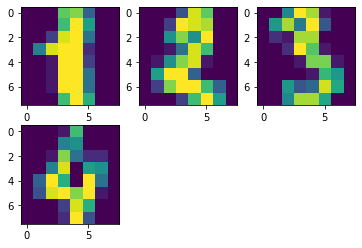

In [26]:
%matplotlib inline

import matplotlib.pyplot as plt
for i in range(1,5):
    plt.subplot(2,3,i)
    plt.imshow(digits.data[i].reshape(8,8))
plt.show()

In [27]:
import math
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( digits.data,digits.target,test_size=0.35)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1168, 64) (629, 64) (1168,) (629,)


In [28]:
from time import time
print( "fitting the classifier to the training set")
t0= time()

from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
#clf = SVC(C=1,gamma=0.1 , verbose = True, kernel='rbf')
param_grid = { 'C': [1e3 , 5e3,1e4,5e4,1e5],
                'gamma': [ 0.0001, 0.0005,0.001,0.005,0.01],}

clf = GridSearchCV( SVC(kernel= 'rbf'), param_grid)
clf.fit( x_train,y_train)
print("done in " , ( time() - t0), "s")

fitting the classifier to the training set
done in  11.122141122817993 s


In [29]:
print( "the accuracy of the model is")
model_score = clf.score( x_test,y_test)
print(model_score * 100, "%")

the accuracy of the model is
99.68203497615262 %


In [30]:
print("best parameters selected from grid search" , clf.best_params_)
print("number of support vectors pereach class",clf.best_estimator_.n_support_)
print(" number of support vector feature wise", clf.best_estimator_.support_vectors_.shape)
print("indices of support vectors", clf.best_estimator_.support_)
print("Dual coefficients", clf.best_estimator_.dual_coef_.shape)
print("dual fficients", clf.best_estimator_.dual_coef_[0])

best parameters selected from grid search {'C': 1000.0, 'gamma': 0.001}
number of support vectors pereach class [33 79 59 61 66 62 48 60 81 80]
 number of support vector feature wise (629, 64)
indices of support vectors [ 100  182  188  217  237  238  242  259  277  278  300  493  553  561
  585  614  617  653  657  691  748  771  791  837  865  883  899  921
  949  983  996 1123 1127    5   27   29   42   47   58   68   86  101
  109  120  138  163  164  191  211  229  231  236  249  275  282  299
  314  315  342  345  379  385  391  447  469  475  481  516  584  596
  640  663  677  692  694  714  732  737  758  761  764  767  768  776
  778  796  816  818  819  838  854  867  868  872  879  885  897  902
  920  923  979  998 1001 1013 1030 1036 1061 1079 1088 1103 1116 1142
   93  116  121  128  156  176  187  200  215  250  284  298  310  359
  380  394  398  399  421  434  461  479  487  526  554  572  623  647
  665  670  683  706  710  717  744  746  755  766  785  787  795  802

In [31]:
from sklearn import linear_model,neighbors

logistic = linear_model.LogisticRegression( solver='lbfgs',max_iter = 1000,multi_class = 'multinomial',verbose=2)
t0 = time()
logistic.fit(x_train,y_train)
print("the time taken for logistic regression", (time() - t0),"s")
print( 'score: ' , 100*logistic.score(x_test,y_test),'%')

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


the time taken for logistic regression 0.6873354911804199 s
score:  96.66136724960255 %


C:\ProgramData\Anaconda3\envs\IT1602-17-737-114\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s finished


In [32]:
help(SVC)

Help on class SVC in module sklearn.svm._classes:

class SVC(sklearn.svm._base.BaseSVC)
 |  C-Support Vector Classification.
 |  
 |  The implementation is based on libsvm. The fit time scales at least
 |  quadratically with the number of samples and may be impractical
 |  beyond tens of thousands of samples. For large datasets
 |  consider using :class:`sklearn.svm.LinearSVC` or
 |  :class:`sklearn.linear_model.SGDClassifier` instead, possibly after a
 |  :class:`sklearn.kernel_approximation.Nystroem` transformer.
 |  
 |  The multiclass support is handled according to a one-vs-one scheme.
 |  
 |  For details on the precise mathematical formulation of the provided
 |  kernel functions and how `gamma`, `coef0` and `degree` affect each
 |  other, see the corresponding section in the narrative documentation:
 |  :ref:`svm_kernels`.
 |  
 |  Read more in the :ref:`User Guide <svm_classification>`.
 |  
 |  Parameters
 |  ----------
 |  C : float, optional (default=1.0)
 |      Regulariza